In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
#variables and terms
tamano = ctrl.Antecedent(np.arange(40,800,1), 'tamano')
distancia = ctrl.Antecedent(np.arange(1,15,1), 'distancia')
precio =  ctrl.Consequent(np.arange(70,3000,1), 'precio')

/Users/ralphsliger/anaconda3/envs/acamica/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


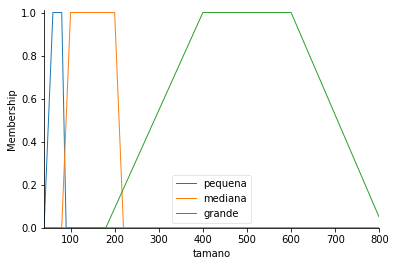

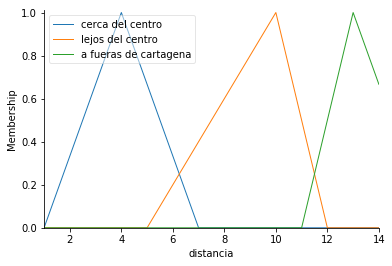

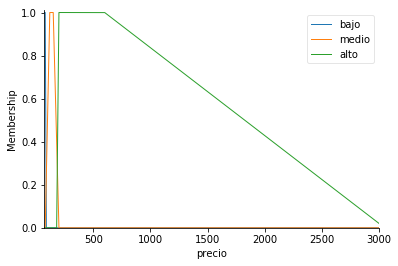

In [3]:
#Membership functions 

tamano['pequena'] = fuzz.trapmf(tamano.universe, [40,60,80,90])
tamano['mediana'] = fuzz.trapmf(tamano.universe, [80,100,200,220])
tamano['grande'] = fuzz.trapmf(tamano.universe, [180,400,600,810])

distancia['cerca del centro'] = fuzz.trimf(distancia.universe,[1,4,7])
distancia['lejos del centro'] = fuzz.trimf(distancia.universe,[5,10,12])
distancia['a fueras de cartagena'] = fuzz.trimf(distancia.universe,[11,13,16])

precio['bajo'] = fuzz.trapmf(precio.universe, [60,70,80,90])
precio['medio'] = fuzz.trapmf(precio.universe, [80,120,150,200])
precio['alto'] = fuzz.trapmf(precio.universe, [180,200,600,3050])




tamano.view()
distancia.view()
precio.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10c549e80>)

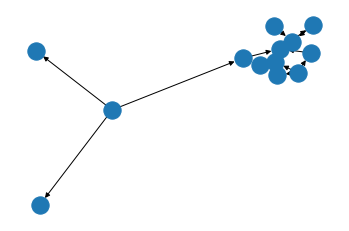

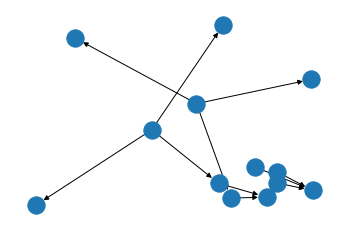

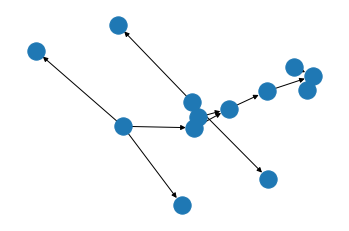

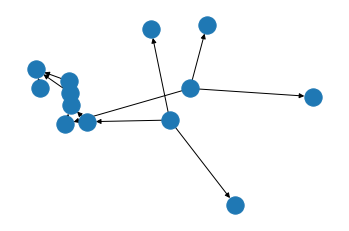

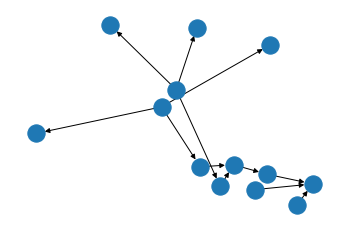

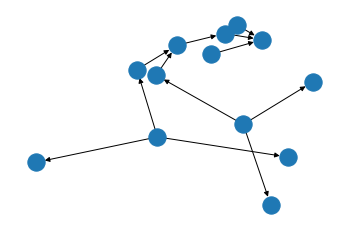

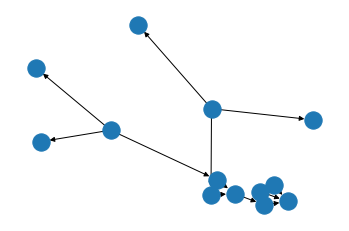

In [4]:
#Rules
rule1 = ctrl.Rule( (tamano['grande'] & distancia['cerca del centro']) |
                    (tamano['grande'] & distancia['lejos del centro']) |
                    (tamano['grande'] & distancia['a fueras de cartagena']),
                    precio['alto']
)


#Cold temperature
r2 = ctrl.Rule(tamano['mediana'] & distancia['cerca del centro'], precio['alto']) 
r3= ctrl.Rule(tamano['mediana'] & distancia['lejos del centro'], precio['medio']) 
r4= ctrl.Rule (tamano['mediana'] & distancia['a fueras de cartagena'], precio['bajo'])
               

r5 = ctrl.Rule(tamano['pequena'] & distancia['cerca del centro'], precio['alto']) 
r6=ctrl.Rule(tamano['pequena'] & distancia['lejos del centro'], precio['medio']) 
r7= ctrl.Rule(tamano['pequena'] & distancia['a fueras de cartagena'], precio['bajo'])

rule1.view()
r2.view()
r3.view()
r4.view()
r5.view()
r6.view()
r7.view()


In [5]:
precio_ctrl = ctrl.ControlSystem(rules=[rule1,r2,r3,r4,r5,r6,r7])
precio_results = ctrl.ControlSystemSimulation(precio_ctrl)



1159.8561030673472


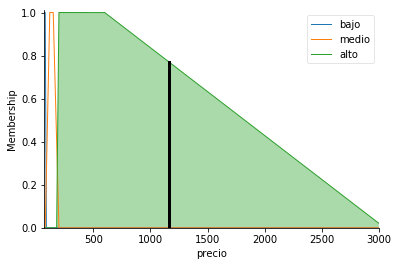

In [7]:
#Passing inputs
precio_results.input['tamano'] = 550
precio_results.input['distancia'] = 4
precio_results.compute()
print(precio_results.output['precio'])
precio.view(sim=precio_results)
